## Perceptrons as Logical Operators
In this section, I'll see one of the many great applications of perceptrons. As logical operators. I'll create the perceptrons for the most common of these, the AND, OR, and NOT operators. And then, I'll see what to do about the exclusive XOR operator.

### What are the weights and bias for AND operation?


In [4]:
import pandas as pd

weight1 = 1.0
weight2 = 1.0
bias = -2.0

test_inputs = [(0,0), (0,1), (1,0), (1,1)]
correct_outputs = [False, False, False, True]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1*test_input[0] + weight2*test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', ' Input 2', ' Linear Combination', ' Activation Output', ' Is Correct'])

if not num_wrong:
    print('Nice! All correct.\n')
else:
    print('Got {} wrong. Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice! All correct.

Input 1   Input 2   Linear Combination   Activation Output  Is Correct
      0         0                 -2.0                   0         Yes
      0         1                 -1.0                   0         Yes
      1         0                 -1.0                   0         Yes
      1         1                  0.0                   1         Yes


### OR Perceptron
The OR perceptron is very similar to an AND perceptron. The OR perceptron has the same line as the AND perceptron, except the line is shifted down. To create OR perceptron what can I do to the weights and/or bias?
 - Increase the weights
 - Decrease the magnitude of the bias

### NOT Perceptron
Unlike the other perceptrons I looked at, the NOT operateion only cares about one  input. The operation returns a 0 if the input is 1 and returns a 1 if it's a 0. The other inputs to the perceptron are ignored.

In [12]:
weight1 = 0.0
weight2 = -1.0
bias = 0.5

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1*test_input[0] + weight2*test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', ' Input 2', ' Linear Combination', ' Activation Output', ' Is Correct'])

if not num_wrong:
    print('Nice! All correct.\n')
else:
    print('Got {} wrong. Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice! All correct.

Input 1   Input 2   Linear Combination   Activation Output  Is Correct
      0         0                  0.5                   1         Yes
      0         1                 -0.5                   0         Yes
      1         0                  0.5                   1         Yes
      1         1                 -0.5                   0         Yes


### XOR Multi-Layer Perceptron
To create XOR logic I'll build a multi-layer perceptron from the AND, NOT, and OR perceptrons.

## Coding the Perceptron Algorithm

In [199]:
import csv
import numpy as np
import matplotlib.pyplot as plt

path = 'data.csv'

with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    X = []
    y = []
    for line in reader:
        X.append(line[0:2])
        y.append(line[2])
    X = np.array(X, dtype='float64')
    y = np.array(y, dtype='int8')

In [198]:
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
     
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines    

In [200]:
boundaries = trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=30)

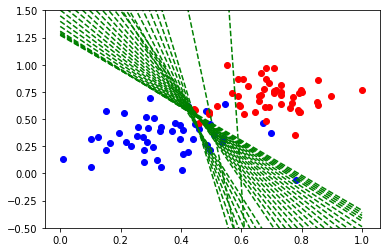

In [201]:
positive = []
negative = []
for i in range(len(X)):
    if y[i] == 1:
        positive.append(X[i])
    else:
        negative.append(X[i])
positive = np.array(positive)
negative = np.array(negative)
plt.scatter(positive.T[0], positive.T[1], c='blue')
plt.scatter(negative.T[0], negative.T[1], c='red')
for b in boundaries:
    x = np.linspace(0.0, 1.0, 10)
    y = b[0] * x + b[1]
    plt.plot(x, y, c='green', linestyle='--')
    plt.ylim(-0.5, 1.5)